In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan

from sklearn.cluster import OPTICS, DBSCAN

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

#### TASK 1:  Adjust the min_cluster_size to 3, 5 and 9

In [2]:
test_data = pd.read_csv('Mall_Customers.csv', encoding='Latin-1') 
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
test_data = test_data.iloc[:,[3,4]].values

In [4]:
test_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

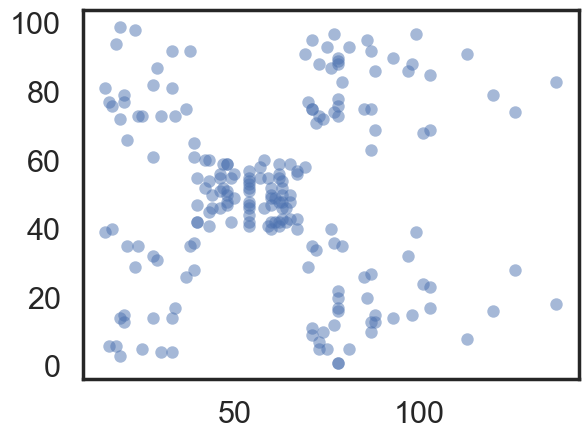

In [5]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [6]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

<Axes: >

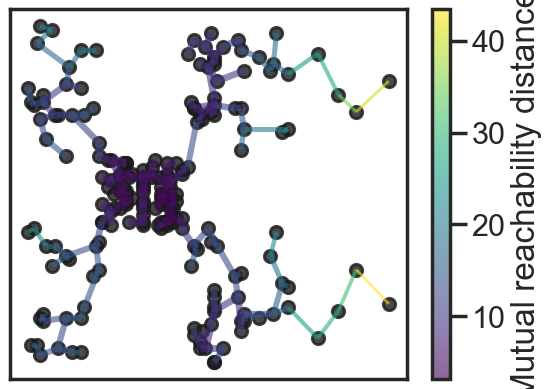

In [7]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

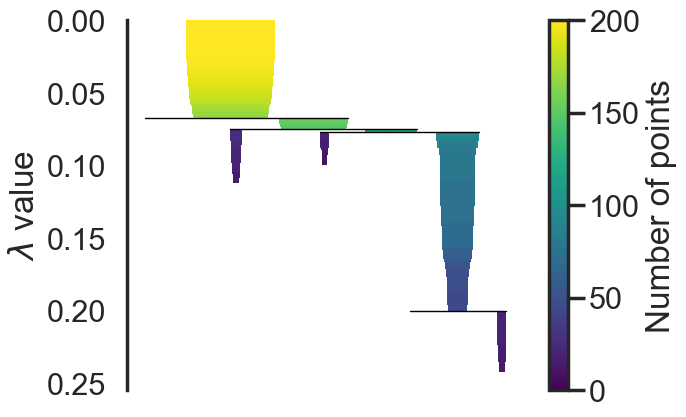

In [8]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

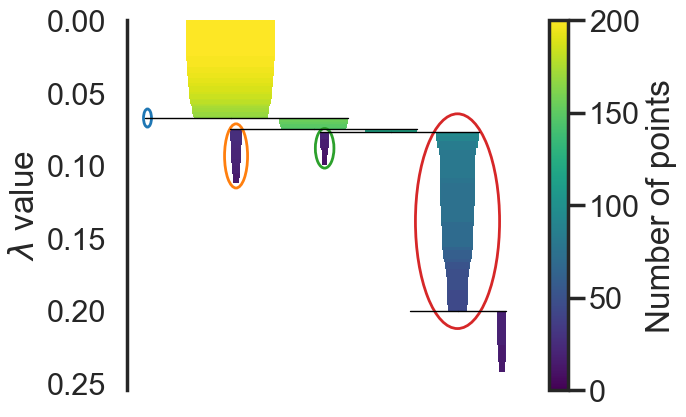

In [9]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

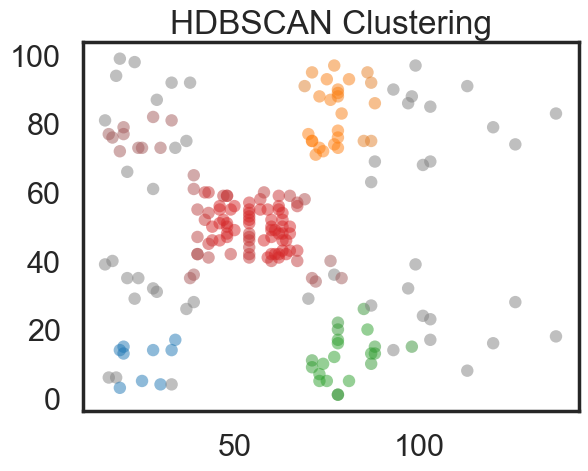

In [10]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()

#### TASK 2:  Compare the performance of two clustering algorithms: OPTICS and DBSCAN

Import the dataset

In [11]:
test_data = pd.read_csv('cereal_activity.csv', encoding='Latin-1') 
test_data.head()

,Unnamed: 0,name,calories,carbo,sugars
0,0,100% Bran,70,5.0,6
1,1,100% Natural Bran,120,8.0,8
2,2,All-Bran,70,7.0,5
3,3,All-Bran with Extra Fiber,50,8.0,0
4,4,Almond Delight,110,14.0,8


In [12]:
test_data = test_data.iloc[:,[3,4]].values
test_data

array([[ 5. ,  6. ],
       [ 8. ,  8. ],
       [ 7. ,  5. ],
       [ 8. ,  0. ],
       [14. ,  8. ],
       [10.5, 10. ],
       [11. , 14. ],
       [18. ,  8. ],
       [15. ,  6. ],
       [13. ,  5. ],
       [12. , 12. ],
       [17. ,  1. ],
       [13. ,  9. ],
       [13. ,  7. ],
       [12. , 13. ],
       [22. ,  3. ],
       [21. ,  2. ],
       [13. , 12. ],
       [12. , 13. ],
       [10. ,  7. ],
       [21. ,  0. ],
       [21. ,  3. ],
       [11. , 10. ],
       [18. ,  5. ],
       [11. , 13. ],
       [14. , 11. ],
       [14. ,  7. ],
       [12. , 10. ],
       [14. , 12. ],
       [13. , 12. ],
       [11. , 15. ],
       [15. ,  9. ],
       [15. ,  5. ],
       [17. ,  3. ],
       [13. ,  4. ],
       [12. , 11. ],
       [11.5, 10. ],
       [14. , 11. ],
       [17. ,  6. ],
       [20. ,  9. ],
       [21. ,  3. ],
       [12. ,  6. ],
       [12. , 12. ],
       [16. ,  3. ],
       [16. , 11. ],
       [16. , 11. ],
       [17. , 13. ],
       [15. ,

Scatter plot of the data

Text(0.5, 1.0, 'Original Data')

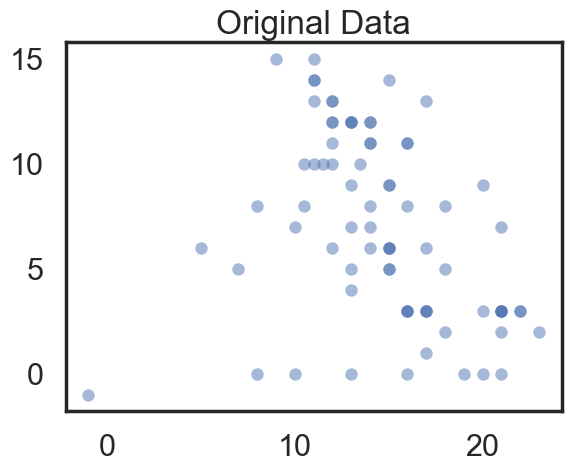

In [13]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)
plt.title("Original Data")

HDBSCAN clustering

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

Plot HDBSCAN results

c:\Users\Barcenilla\anaconda3\Lib\site-packages\hdbscan\plots.py:837: RuntimeWarning: divide by zero encountered in divide
  line_width = edge_linewidth * (np.log(self._mst.T[2].max() / self._mst.T[2]) + 1.0)
c:\Users\Barcenilla\anaconda3\Lib\site-packages\matplotlib\lines.py:66: RuntimeWarning: invalid value encountered in scalar multiply
  scaled_offset = offset * lw


<Axes: >

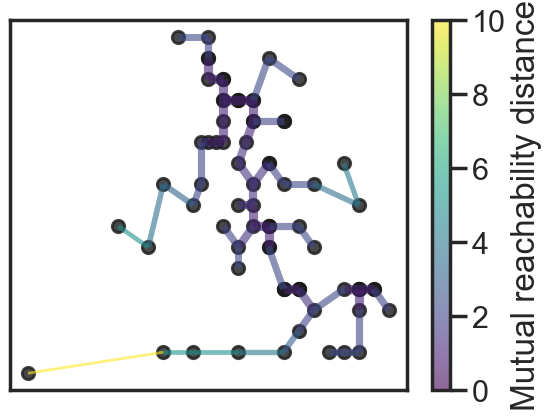

In [15]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

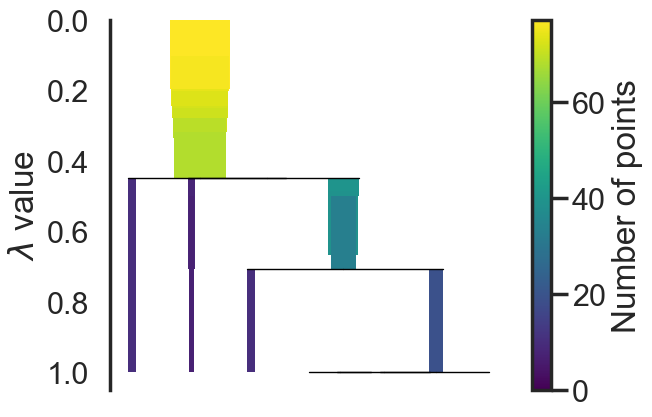

In [16]:
clusterer.condensed_tree_.plot()

c:\Users\Barcenilla\anaconda3\Lib\site-packages\hdbscan\plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<Axes: ylabel='$\\lambda$ value'>

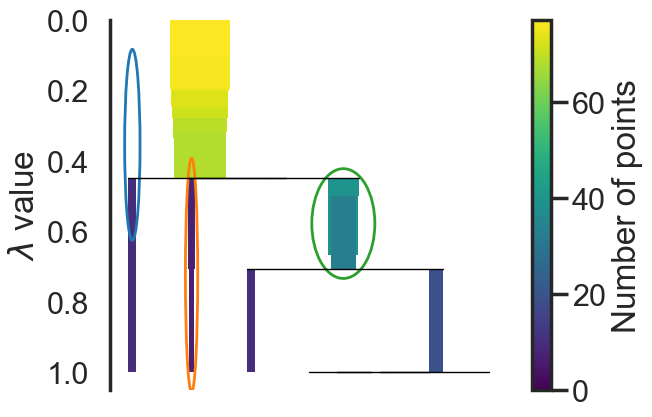

In [17]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

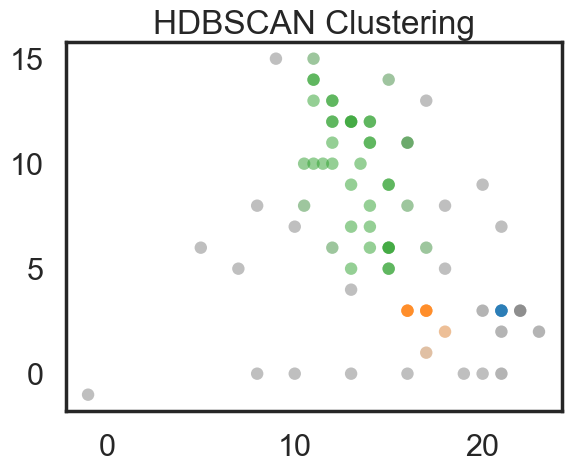

In [18]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()

OPTICS clustering

In [19]:
clusterer_optics = OPTICS(min_samples=3)
clusterer_optics.fit(test_data)

c:\Users\Barcenilla\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_samples=3)

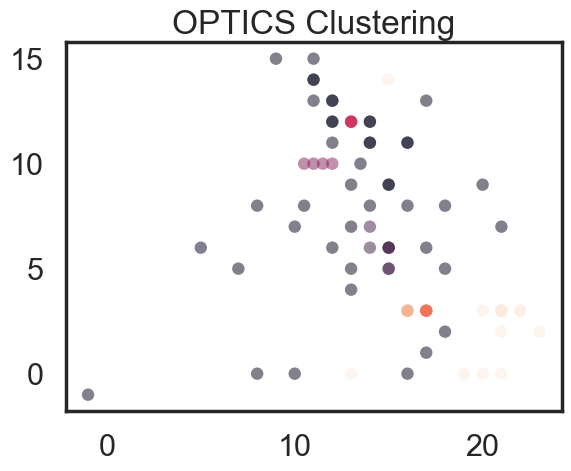

In [20]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=clusterer_optics.labels_, **plot_kwds)
plt.title("OPTICS Clustering")
plt.show()

DBSCAN clustering

In [21]:
clusterer_dbscan = DBSCAN(eps=0.5, min_samples=5)
clusterer_dbscan.fit(test_data)

DBSCAN()

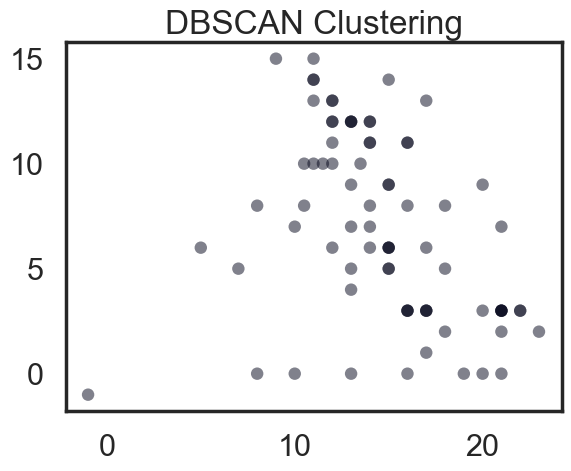

In [22]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=clusterer_dbscan.labels_, **plot_kwds)
plt.title("DBSCAN Clustering")
plt.show()